In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os


In [3]:
def tau_p(p1,k1,Nn):
    g=0.1
    return g*Nn**2/(np.pi**2*k1*p1**2)

def Xp2(T1,F1,ta,k1,Nn):
    g=0.1
    ps=np.arange(1,Nn+1,1)
    tp=tau_p(ps,k1,Nn)

    return np.mean(T1*tp/(2*Nn*g)+F1**2*ta*tp/(2*Nn*g**2)-F1**2*ta**2/(2*Nn*g**2))

0.3 0.3 100.0 5.0 20.0
6.04777667660939
0.3 0.3 2.0 5.0 20.0
3.634072706036014
0.3 0.3 20.0 5.0 20.0
5.824812381540717
0.3 0.3 200.0 5.0 20.0
6.05629673389067
0.3 0.3 40.0 5.0 20.0
5.977024974716962
0.3 0.8 100.0 5.0 20.0
10.05819604421168
0.3 0.8 2.0 5.0 20.0
7.545351362367621
0.3 0.8 20.0 5.0 20.0
9.875490113094704
0.3 0.8 40.0 5.0 20.0
9.972304627757545


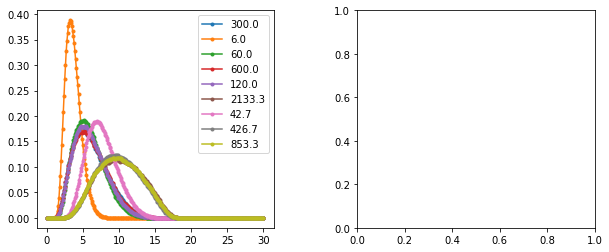

In [24]:
fig1,axes=plt.subplots(1,2,figsize=(10,4),gridspec_kw={'wspace':0.35, 'hspace':0.4})

[ax1,ax2]=axes

dt=0.001
bl=100
tval=np.logspace(-2,5,100)

N=100
fpath='../../data/ROUSE_chain_confined_Ns/'
X,Y=[],[]
ind=4
for fname in os.listdir(fpath):
    if 'RadGyr' in fname and 'npz' in fname:
        # print(fname.split('_'))
        T= float(fname.split('_')[ind].replace('T',''))
        F=float(fname.split('_')[ind+1].replace('F',''))
        Ta=float(fname.split('_')[ind+2].replace('Ta',''))
        kb=float(fname.split('_')[ind+7].replace('kb',''))
        Esoft=float(fname.split('_')[ind+3].replace('Esoft',''))
        R0=float(fname.split('_')[ind+4].replace('R0',''))


        if T==0.3:
            npzfile=np.load(fpath+fname)
            print(T,F,Ta,kb,R0)
            # print(npzfile['chrms'].flatten().min())

            hist,bin_edges=np.histogram(npzfile['chrms'].flatten(), bins=np.linspace(0,30,300),
                                        density=True)
            ax1.plot(bin_edges[1:],hist,'.-', label='{:.1f}'.format(F**2*Ta/(0.1*T)))
            X.append(F**2*Ta/(0.1*T))
            
            mu=np.mean(npzfile['chrms'].flatten())
            Y.append(mu)
            print(mu)
            # sig=np.std(npzfile['chrms'].flatten())
            # ax1.plot(bin_edges[1:],(1/(sig*np.sqrt(2*np.pi)))*np.exp(-0.5*(bin_edges[1:]-mu)**2/sig),'k--')
            # print(Xp2(T,F,Ta,kb,100))

ax1.legend(bbox_to_anchor=(1,1))

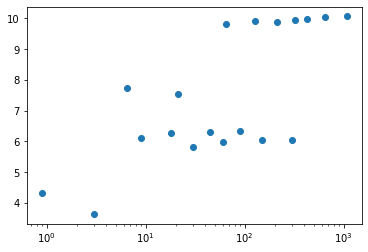

In [23]:
plt.semilogx(np.array(X)/2,Y,'o')